In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hamp_pred.src.predictor import Predictor
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.input_prep.encode import RadianEncoder, MultiEncoder, OneHotEncoderSeq, RadiousPhobosEncoder
from hamp_pred.src.predictor_config import  PredictionConfig
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper

2023-01-25 19:14:21.695542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = './data'

In [13]:
operator = MultiChainOperator(MultiEncoder([RadiousPhobosEncoder(), OneHotEncoderSeq()]), SeqWindow(11, 11), RadianEncoder(100),  SeqWindow(11, 11, null_char=[[0]]),
                                      parallel=True)
model_conf = model_config = {
    'activation': 'tanh',
    'norm': True,
    'n_layers': 1,
    'kernel_sizes': (3, 5, 7),
    'lstm': 2,
    'dense': 1,
    'reshape_out': False,
    'epochs': 30
}
conf = PredictionConfig(BaseConvolutionalWrapper, operator, model_conf)
mod = Predictor('hamp_rot', config=conf)

# PDB set

9

1/1 [==============================] - 1s 1s/step


Text(0.5, 1.0, 'Predictions for validation set')

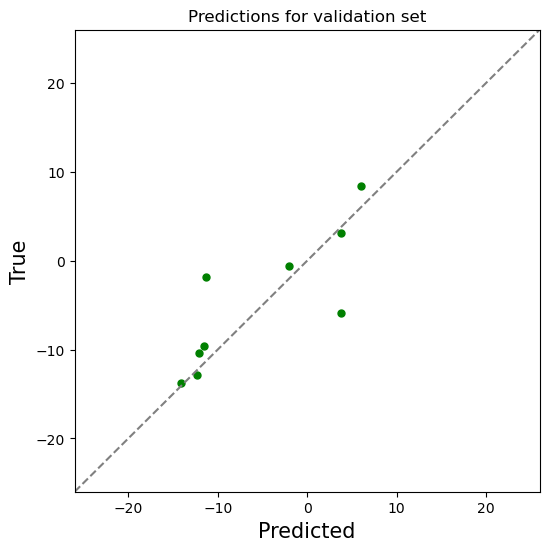

4.722571248645952

#  Validation set

/tmp/ipykernel_19880/79076738.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  val = data.loc[val_ids]


2/2 [==============================] - 2s 134ms/step


Text(0.5, 1.0, 'Predictions for validation set')

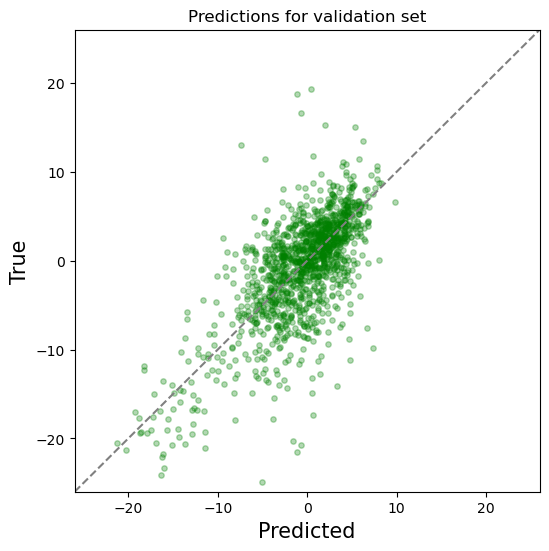

4.384719342219364